In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gauss_newton import generate_probabilities, generate_data, sigmoidal, dsigmoidal, armijo

In [2]:
class KullbackLeibler:
    def __init__(self, gamma):
        self.t, self.alpha = generate_probabilities(gamma)
        self.n = self.t.shape[0]

    def loss(self, y):
        return -np.log(y) * self.alpha - np.log(1. - y) * (1 - self.alpha)

    def dloss(self, y):
        return -(1 / y) * self.alpha + (1 / (1 - y)) * (1 - self.alpha)

    def ddloss(self, y):
        return (1 / y ** 2) * self.alpha + (1 / (1 - y) ** 2) * (1 - self.alpha)

    def F(self, x):
        return sigmoidal(self.t * x[0] + x[1]) #- self.alpha

    def J(self, x):
        J = np.array([dsigmoidal(self.t * x[0] + x[1]) * self.t,
                      dsigmoidal(self.t * x[0] + x[1])]).T
        return J

    def f(self, x):
        y = self.F(x)
        y = self.loss(y)
        y = np.sum(y)
        return y

    def df(self, x):
        F_x = self.F(x)
        J_x = self.J(x)
        dloss_x = self.dloss(F_x)

        return J_x.T.dot(dloss_x)

    def Bf(self, x):
        F_x = self.F(x)
        J_x = self.J(x)
        ddloss_x = np.diag(self.ddloss(F_x))

        return J_x.T.dot(ddloss_x.dot(J_x))

    def plot(self, x):
        t_axis = np.linspace(-10, 10, 50)
        plt.scatter(self.t, self.alpha)
        plt.plot(t_axis, sigmoidal(t_axis * x[0] + x[1]))
        plt.show()

In [3]:
def minimize_gauss_newton(problem, x0, tol=1e-5, maxit=1000):

    x = np.array(x0)
    iterates = [x.copy()]
    distances = []

    for k in range(maxit):
        g = problem.df(x)
        delta_x = np.linalg.solve(problem.Bf(x), -g)
        alpha = armijo(problem.f, x, g, delta_x)
        x += alpha * delta_x
        iterates.append(x.copy())
        distance = np.linalg.norm(delta_x)
        distances.append(distance)

        if distance < tol:
            return {"x": x, "distances": distances, "iterations": k}

    print("Reached maximum number of iterations!")
    return {"x": x, "distances": distances, "iterations": k}

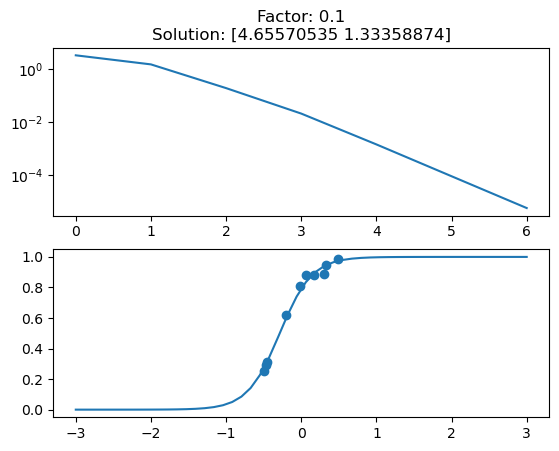

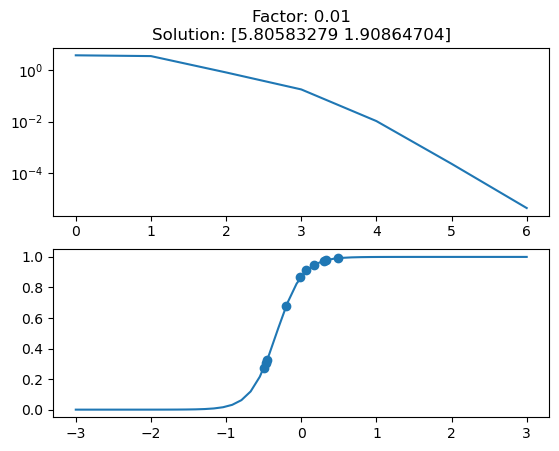

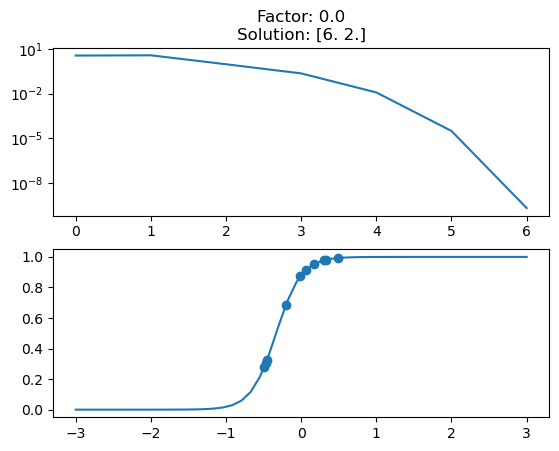

In [4]:
    t_axis = np.linspace(-3, 3, 50)

    for gamma in [1.e-1, 1.e-2, 0.]:
        kl_problem = KullbackLeibler(gamma)
        sol = minimize_gauss_newton(kl_problem, [0.1, 0.1])
        x = sol["x"]
        delta_x_list = sol["distances"]

        plt.subplot(211)
        plt.title("Factor: " + str(gamma) + "\nSolution: " + str(x))
        plt.plot(delta_x_list)
        plt.yscale("log")

        plt.subplot(212)
        plt.scatter(kl_problem.t, kl_problem.alpha)
        plt.plot(t_axis, sigmoidal(t_axis * x[0] + x[1]))
        plt.show()